In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.sparse import csr_matrix
import sklearn
import itertools

In [3]:
pd.set_option('display.max_columns', None)
movies = pd.read_csv("data/movies2.csv")
tags = pd.read_csv("data/tags2.csv")
ratings = pd.read_csv("data/ratings2.csv")
links = pd.read_csv("data/links2.csv")

In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
movies[movies["genres"] == "(no genres listed)"]

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [6]:
movies["genres"].value_counts()

Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Comedy|Sci-Fi|Western                              1
Crime|Horror|Sci-Fi                                       1
Comedy|Crime|Drama|Musical|Mystery|Romance                1
Action|Crime|Mystery|Romance|Thriller                     1
Name: genres, Length: 951, dtype: int64

In [7]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


## ------------------------------------------------------------------------------------------------------------------------------

In [8]:
def convert_timestamp(data):
    date = []
    for timestamp in data["timestamp"]:
        to_date = datetime.fromtimestamp(timestamp).strftime('%d-%m-%y')
        date.append(to_date)
    data["date"] = date
    del data["timestamp"]
    return data

In [9]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
ratings = convert_timestamp(ratings)
ratings

,userId,movieId,rating,date
0,1,1,4.0,30-07-00
1,1,3,4.0,30-07-00
2,1,6,4.0,30-07-00
3,1,47,5.0,30-07-00
4,1,50,5.0,30-07-00
...,...,...,...,...
100831,610,166534,4.0,04-05-17
100832,610,168248,5.0,04-05-17
100833,610,168250,5.0,08-05-17
100834,610,168252,5.0,04-05-17


In [11]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


## ------------------------------------------------------------------------------------------------------------------------------

In [12]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [13]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


## ------------------------------------------------------------------------------------------------------------------------------

In [14]:
data = ratings.merge(movies,on='movieId')
data = data.merge(links,on='movieId')
data = data.drop(columns = 'tmdbId')
data["imdbId"] = "www.imdb.com/title/tt" + data["imdbId"].astype(str)
data.rename(columns = {'imdbId':'link'}, inplace = True)
data['published year'] = data.title.str.extract('(\(\d\d\d\d\))',expand=False)

In [15]:
data

,userId,movieId,rating,date,title,genres,link,published year
0,1,1,4.0,30-07-00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
1,5,1,4.0,08-11-96,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
2,7,1,4.5,25-01-05,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
3,15,1,2.5,13-11-17,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
4,17,1,4.5,18-05-11,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,19-11-16,Bloodmoon (1997),Action|Thriller,www.imdb.com/title/tt118745,(1997)
100832,610,160527,4.5,19-11-16,Sympathy for the Underdog (1971),Action|Crime|Drama,www.imdb.com/title/tt66806,(1971)
100833,610,160836,3.0,03-05-17,Hazard (2005),Action|Drama|Thriller,www.imdb.com/title/tt798722,(2005)
100834,610,163937,3.5,04-05-17,Blair Witch (2016),Horror|Thriller,www.imdb.com/title/tt1540011,(2016)


## No row dublicated in the data


In [16]:
data.duplicated(["movieId","userId", "rating", "date"]).sum()

0

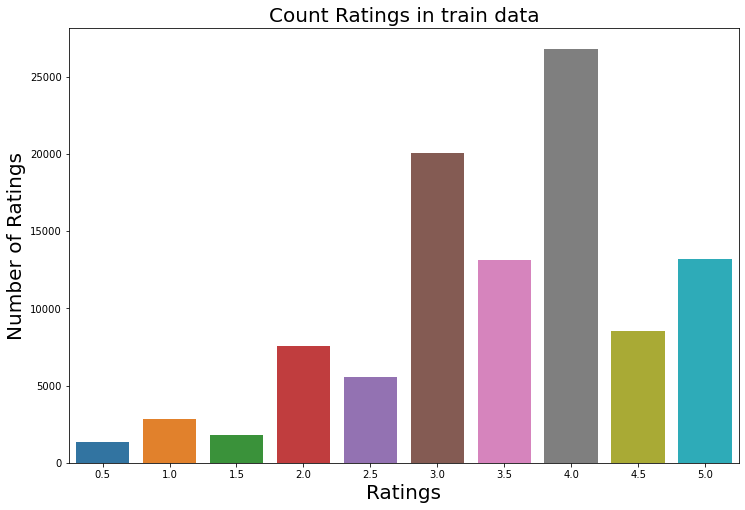

In [17]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data = data)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

## Find the number of rated movies per user

In [18]:
num_rated_movies_per_user = data.groupby(by = "userId")["rating"].count().sort_values(ascending = False)
num_rated_movies_per_user.head()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
Name: rating, dtype: int64

## Find the rating number per Movie


In [19]:
num_ratings_per_movie = data.groupby(by = "title")["rating"].count().sort_values(ascending = False)
num_ratings_per_movie.head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [20]:
data.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [21]:
data.to_csv(r'movie_recommendation.csv', index = False)

In [22]:
avg_rating = data.groupby('title').rating.sum()/data.groupby('title').rating.count()
avg_rating.sort_values(ascending = False)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [23]:
from scipy import sparse
sparse_data = sparse.csr_matrix((data.rating, (data.userId, data.movieId)))

In [24]:
sparse_data.sum()/sparse_data.count_nonzero()

3.501556983616962

## -----------------------------------------------------------------------------------------------------------------

<AxesSubplot:>

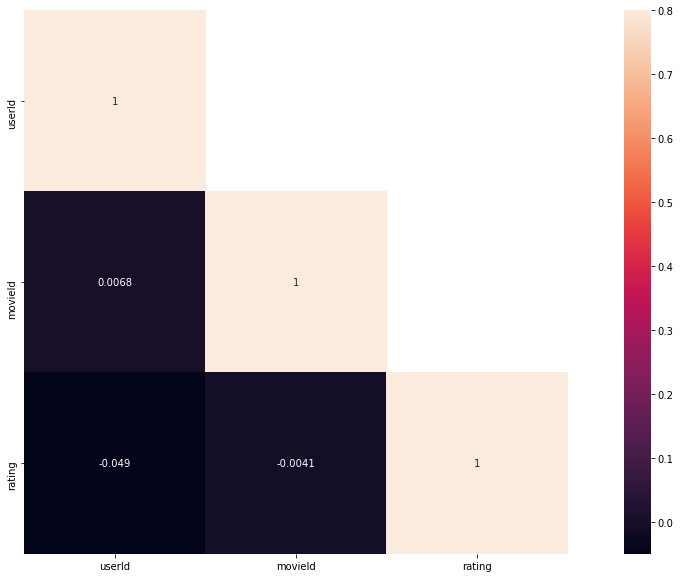

In [25]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<AxesSubplot:>

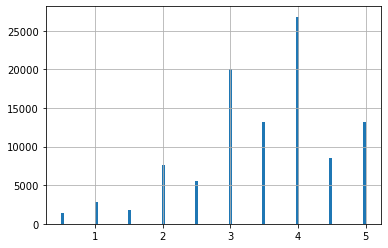

In [26]:
data['rating'].hist(bins=100)

## Check outlires in the data

In [27]:
Q1 = data['rating'].quantile(0.25)
Q3 = data['rating'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['rating'] < (Q1 - 1.5 * IQR)) | (data['rating'] > (Q3 + 1.5 * IQR))]
data2 = data[~data.isin(outliers)]
data2 = data[data['rating'].notnull()]

In [28]:
data2

,userId,movieId,rating,date,title,genres,link,published year
0,1,1,4.0,30-07-00,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
1,5,1,4.0,08-11-96,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
2,7,1,4.5,25-01-05,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
3,15,1,2.5,13-11-17,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
4,17,1,4.5,18-05-11,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,www.imdb.com/title/tt114709,(1995)
...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,19-11-16,Bloodmoon (1997),Action|Thriller,www.imdb.com/title/tt118745,(1997)
100832,610,160527,4.5,19-11-16,Sympathy for the Underdog (1971),Action|Crime|Drama,www.imdb.com/title/tt66806,(1971)
100833,610,160836,3.0,03-05-17,Hazard (2005),Action|Drama|Thriller,www.imdb.com/title/tt798722,(2005)
100834,610,163937,3.5,04-05-17,Blair Witch (2016),Horror|Thriller,www.imdb.com/title/tt1540011,(2016)


<div style = "color: blue"> <h3> no outlires in the data to remove </h3></div>

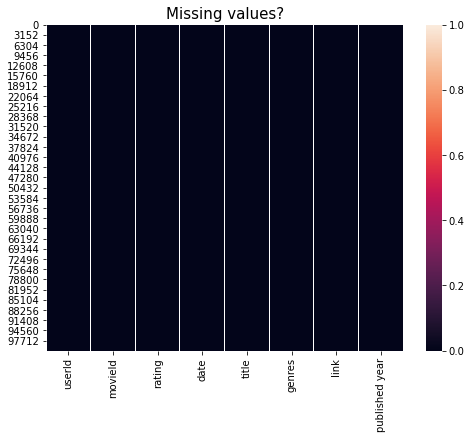

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())
plt.title("Missing values?", fontsize = 15)
plt.show()

In [30]:
missing_data = data.isnull()

In [31]:
missing_data["published year"].value_counts()

False    100818
True         18
Name: published year, dtype: int64

## Naiev collaborative filltering# 

In [32]:
movie_user_mat = data.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [33]:
movie_user_mat

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,3.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,0.0,2.5,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.5,0.0,4.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,4.0,0.0,0.0,3.0,3.0,4.0,0.0,3.0,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,4.0,0.0,4.0,0.0,0.0,3.0,4.0,0.0,0.0,3.5,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,3.0,4.0,0.0,0.0,4.5,4.0,4.0,0.0,0.0,0.0,0.0,5.0,3.5,0.0,4.5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,5.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.0,0.0,3.0,4.0,0.0,3.5,5.0,0.0,0.0,3.5,0.0,0.0,3.5,0.0,0.0,5.0,0.0,0.0,3.5,3.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0

In [34]:
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

In [35]:
movie_user_mat_sparse

<9724x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.neighbors import NearestNeighbors
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [37]:
df_movies = movies[["movieId","title"]]

In [38]:
movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(df_movies.set_index('movieId').loc[movie_user_mat.index].title))
}

In [39]:
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_movie, verbose=True):
    """
    return the closest match via fuzzy ratio. 
    
    Parameters
    ----------    
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    verbose: bool, print log if True
    
    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

In [40]:
def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    """
    return top n similar movie recommendations based on user's input movie
    Parameters
    ----------
    model_knn: sklearn model, knn model
    data: movie-user matrix
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    n_recommendations: int, top n recommendations
    Return
    ------
    list of top n similar movie recommendations
    """
    # fit
    model_knn.fit(data)
    
    # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    print(idx)
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)

    raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    test_array = []
    for i, (idx, dist) in enumerate(raw_recommends):
        test_array.append(reverse_mapper[idx])
        print(reverse_mapper[idx])
    return(test_array)

In [41]:
def test(my_favorite):
    
    test_array = []
    test_array = make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    fav_movie=my_favorite,
    mapper=movie_to_idx,
    n_recommendations=10)
    
    return test_array
     
my_favorite = "Iron Man"
test_array = []
test_array = test(my_favorite) 


You have input movie: Iron Man
Found possible matches in our database: ['Iron Man (1931)', 'Iron Man (2008)', 'Iron Man 3 (2013)', 'Iron Man 2 (2010)']

9426
Recommendation system start to make inference
......

Recommendations for Iron Man:
Iron Man 2 (2010)
Deadpool (2016)
Captain America: The First Avenger (2011)
Thor (2011)
Iron Man 3 (2013)
Easy A (2010)
21 Jump Street (2012)
Ex Machina (2015)
Avengers: Age of Ultron (2015)
Iron Man (1931)


In [42]:
test_array

['Iron Man 2 (2010)',
 'Deadpool (2016)',
 'Captain America: The First Avenger (2011)',
 'Thor (2011)',
 'Iron Man 3 (2013)',
 'Easy A (2010)',
 '21 Jump Street (2012)',
 'Ex Machina (2015)',
 'Avengers: Age of Ultron (2015)',
 'Iron Man (1931)']

In [43]:
#from pyspark.ml.evaluation import RegressionEvaluator

#evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",predictionCol="prediction")
#rmse = evaluator.evaluate(predictions)
#print("Root-mean-square error = " + str(rmse))

## -----------------------------------------------------------------------------------------------------------------------

In [44]:
data2 = data.head(10000)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(data2["genres"])

In [46]:
tfidf_matrix.shape

(10000, 79)

In [47]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [48]:
smd = df_movies.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [49]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [50]:
get_recommendations("Toy Story (1995)").head(10)

1                         Jumanji (1995)
2                Grumpier Old Men (1995)
3               Waiting to Exhale (1995)
4     Father of the Bride Part II (1995)
5                            Heat (1995)
6                         Sabrina (1995)
7                    Tom and Huck (1995)
8                    Sudden Death (1995)
9                       GoldenEye (1995)
10        American President, The (1995)
Name: title, dtype: object

# ---------------------------------------------------------------------------------

In [51]:
piv_norm = movie_user_mat
piv_norm

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,3.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,0.0,2.5,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.5,0.0,4.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,4.0,0.0,0.0,3.0,3.0,4.0,0.0,3.0,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,4.0,0.0,4.0,0.0,0.0,3.0,4.0,0.0,0.0,3.5,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,3.0,4.0,0.0,0.0,4.5,4.0,4.0,0.0,0.0,0.0,0.0,5.0,3.5,0.0,4.5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,5.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.0,0.0,3.0,4.0,0.0,3.5,5.0,0.0,0.0,3.5,0.0,0.0,3.5,0.0,0.0,5.0,0.0,0.0,3.5,3.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0

In [52]:
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]
piv_norm = piv_norm.T
print(piv_norm)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     0.0     0.0     0.0     0.0     0.0     2.5     0.0   
607         4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
608         2.5     2.0     2.0     0.0     0.0     0.0     0.0     0.0   
609         3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
610         5.0     0.0     0.0     0.0     0.0     5.0     0.0     0.0   

movieId  9       10     

In [62]:
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)
print(piv_sparse)

  (0, 0)	4.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 43)	5.0
  (0, 46)	5.0
  (0, 62)	3.0
  (0, 89)	5.0
  (0, 97)	4.0
  (0, 124)	5.0
  (0, 130)	5.0
  (0, 136)	5.0
  (0, 184)	5.0
  (0, 190)	3.0
  (0, 197)	5.0
  (0, 201)	4.0
  (0, 224)	5.0
  (0, 257)	3.0
  (0, 275)	3.0
  (0, 291)	5.0
  (0, 307)	4.0
  (0, 314)	4.0
  (0, 320)	5.0
  (0, 325)	4.0
  (0, 367)	3.0
  (0, 384)	4.0
  :	:
  (609, 9238)	5.0
  (609, 9246)	4.5
  (609, 9256)	4.0
  (609, 9268)	5.0
  (609, 9274)	3.5
  (609, 9279)	3.5
  (609, 9282)	3.0
  (609, 9288)	3.0
  (609, 9304)	3.0
  (609, 9307)	2.5
  (609, 9312)	4.5
  (609, 9317)	3.0
  (609, 9324)	3.0
  (609, 9339)	4.0
  (609, 9341)	4.0
  (609, 9348)	3.5
  (609, 9371)	3.5
  (609, 9372)	3.5
  (609, 9374)	5.0
  (609, 9415)	4.0
  (609, 9416)	4.0
  (609, 9443)	5.0
  (609, 9444)	5.0
  (609, 9445)	5.0
  (609, 9485)	3.0


In [54]:
user_similarity = cosine_similarity(piv_sparse)

In [55]:
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.index, columns = piv_norm.index)

In [56]:
user_sim_df

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,0.132499,0.016458,0.092971,0.113238,0.160689,0.169858,0.264358,0.214868,0.325376,0.160969,0.153162,0.050691,0.106669,0.155193,0.099261,0.105791,0.238933,0.202866,0.145251,0.099781,0.164454,0.146211,0.151945,0.083544,0.074508,0.071673,0.144736,0.138588,0.329782,0.094755,0.109053,0.255660,0.122498,0.110829,0.327922,0.109975,0.063193,0.098072,0.100929,0.106080,0.126699,0.048781,0.062840,0.130632,0.063314,0.134110,0.345034,0.157534,0.209374,0.066564,0.115522,0.108215,0.216159,0.315212,0.064604,0.233522,0.119046,0.265359,0.154213,0.078068,0.098955,0.209968,0.049217,0.063063,0.142639,0.182982,0.097955,0.177981,0.216426,0.065308,0.109261,0.216061,0.111356,0.165402,0.016092,0.147391,0.032086,0.071453,0.025576,0.051841,0.334727,0.028767,0.232766,0.110082,0.178069,0.282780,0.086557,0.062187,0.066231,0.147763,0.141447,0.156466,0.211480,0.121173,0.090142,0.019425,0.066894,0.057909,0.151465,0.142933,0.071601,0.167299,0.072532,0.078342,0.225257,0.18570

In [57]:
def top_users(user):
    users = []
    if user not in user_sim_df.columns:
        return('No data available on user {}'.format(user))
    
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        user_sim = (user, sim)
        users.append(user_sim)
        #print('User: {0}, Similarity: {1:.2f}'.format(user, sim)) 
    return users

In [58]:
users = top_users(610)

In [59]:
user_movies = data[data["userId"] == 610]["title"]
user_movies = list(user_movies)
print(type(user_movies))

<class 'list'>


In [60]:
def sim_movies(users):
    movies = []
    for user in users:
        movies.append(data[data["userId"] == user[0]]["title"])
    movies = list(itertools.chain.from_iterable(movies))
    movies = list(set(movies))
    movies = set(movies) - set(user_movies)
    return movies

In [61]:
sim_movies(users)

{'Jawbreaker (1999)',
 "Bear, The (Ours, L') (1988)",
 '20,000 Leagues Under the Sea (1954)',
 'Once Upon a Time in China II (Wong Fei-hung Ji Yi: Naam yi dong ji keung) (1992)',
 'Wave, The (Welle, Die) (2008)',
 'Dying Young (1991)',
 'Throw Momma from the Train (1987)',
 'Lost in La Mancha (2002)',
 'The Shape of Water (2017)',
 'Splash (1984)',
 'Very Bad Things (1998)',
 'My Bodyguard (1980)',
 'Batman: Under the Red Hood (2010)',
 'Batman Beyond: Return of the Joker (2000)',
 'American Werewolf in Paris, An (1997)',
 'Chuck & Buck (2000)',
 'American Astronaut, The (2001)',
 'Goldfinger (1964)',
 'Any Given Sunday (1999)',
 'Borrowers, The (1997)',
 "I'll Do Anything (1994)",
 'Invasion of the Body Snatchers (1978)',
 'Thin Red Line, The (1998)',
 'Doctor Zhivago (1965)',
 'Blind Side, The  (2009)',
 'Some Kind of Wonderful (1987)',
 'Wonder Woman (2009)',
 'Mission, The (1986)',
 'Creepshow 2 (1987)',
 'Fat Albert (2004)',
 'NeverEnding Story II: The Next Chapter, The (1990)',
 